In [51]:
# Lorenzo Carlo Causin, 1234098
# Andrea Bertola, 2055557
# Eleonora Fattorini, 2037886
# Paolo Pavone, 2045646
# Simone Perra, 2037013

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
import os
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import EfficientNetB0, VGG16
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from sklearn.metrics import classification_report,confusion_matrix
import ipywidgets as widgets
import io
from PIL import Image
from keras.layers import MaxPooling2D,Conv2D,Dense,BatchNormalization,Dropout,GlobalAveragePooling2D,Flatten,Input
from IPython.display import display,clear_output
from warnings import filterwarnings
#for dirname, _, filenames in os.walk('/kaggle/input'):
    #for filename in filenames:
        #print(os.path.join(dirname, filename))

---

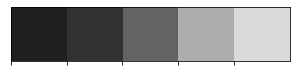

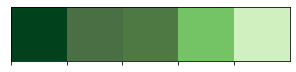

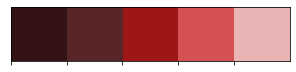

In [52]:
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_red = ["#331313", "#582626", '#9E1717', '#D35151', '#E9B4B4']
colors_green = ['#01411C','#4B6F44','#4F7942','#74C365','#D0F0C0']

sns.palplot(colors_dark)
sns.palplot(colors_green)
sns.palplot(colors_red)

---

In [53]:
labels = ['glioma_tumor','meningioma_tumor','pituitary_tumor']

In [54]:
from numpy import expand_dims
#from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot


X_train = []
y_train = []
image_size = 150
for i in labels:
    folderPath = os.path.join('D:/PBS/labelled Dataset','Training',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        
       #selecting only no tumor images sorting by labels 
        if i=='no_tumor':
            data = img_to_array(img)
            #expand ranks of the images
            samples = expand_dims(data, 0)
            
            # create image data augmentation generator
            
            datagen = ImageDataGenerator(rotation_range=90 , horizontal_flip=True)
            
            
            # prepare iterator
            
            it = datagen.flow(samples, batch_size=1)
            
           #generate samples and plot
            for k in range(2):
                
                # define subplot
                pyplot.subplot(330 + 1 + i)
                
                
                # generate batch of images
                batch = it.next()
               
                
                # convert to unsigned integers for viewing
                image = batch[0].astype('uint8')
                
                pyplot.imshow(image)
                
            # show the figure
            pyplot.show()
                
            X_train.append(image)
            y_train.append(i)
        else:
            X_train.append(img)
            y_train.append(i)
        
for i in labels:
    folderPath = os.path.join('D:/PBS/labelled Dataset','Testing',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        y_train.append(i)
        
X_train = np.array(X_train)
#print X_train lenght to check if the array length increase by 395
print(len(X_train))
y_train = np.array(y_train)

100%|██████████| 74/74 [00:00<00:00, 116.73it/s]

2764


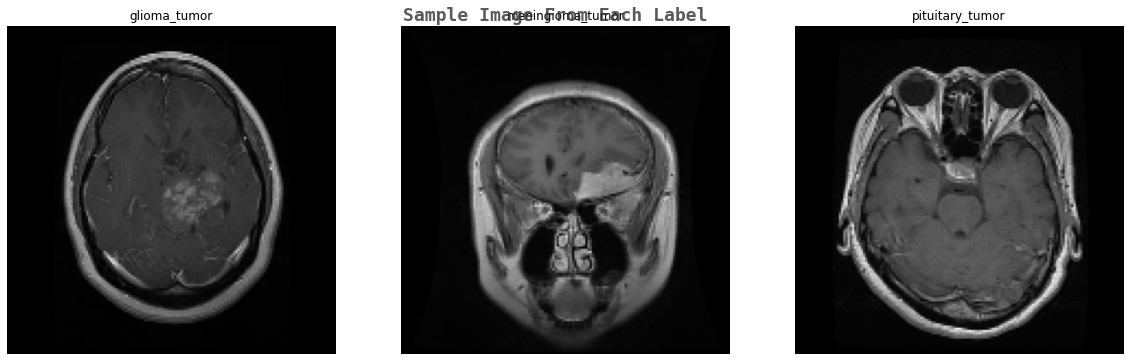

In [55]:
k=0
fig, ax = plt.subplots(1,3,figsize=(20,20))
fig.text(s='Sample Image From Each Label',size=18,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=0.62,x=0.4,alpha=0.8)
for i in labels:
    j=0
    while True :
        if y_train[j]==i:
            ax[k].imshow(X_train[j])
            ax[k].set_title(y_train[j])
            ax[k].axis('off')
            k+=1
            break
        j+=1

In [56]:
X_train, y_train = shuffle(X_train,y_train, random_state=101)

In [57]:
X_train.shape

(2764, 150, 150, 3)

In [58]:
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train, test_size=0.1,random_state=101)

In [59]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)


y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [60]:
from keras.models import Sequential,Model
model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(150, 150, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='Adam')
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_611 (Conv2D)         (None, 150, 150, 32)      416       
                                                                 
 conv2d_612 (Conv2D)         (None, 150, 150, 32)      4128      
                                                                 
 batch_normalization_604 (Ba  (None, 150, 150, 32)     128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 75, 75, 32)       0         
 g2D)                                                            
                                                                 
 dropout_11 (Dropout)        (None, 75, 75, 32)        0         
                                                                 
 conv2d_613 (Conv2D)         (None, 75, 75, 64)       

In [61]:
print(model.output)
#test a data augmentation with the keras leyer 
#model = tf.keras.layers.RandomTranslation(
    #height_factor = 0.3, width_factor=0.3, fill_mode='nearest',
    #interpolation='nearest', seed=10, fill_value=0.0)(model)
    
#this represents a 2D convolutional filtering attempt, which led to severe worsened performances     
#input_shape = (3659, 150, 150, 3)  
#model = tf.keras.layers.Conv2D( 2, 3, activation='relu', input_shape=input_shape)(model)
    


KerasTensor(type_spec=TensorSpec(shape=(None, 3), dtype=tf.float32, name=None), name='dense_11/Softmax:0', description="created by layer 'dense_11'")


In [62]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_611 (Conv2D)         (None, 150, 150, 32)      416       
                                                                 
 conv2d_612 (Conv2D)         (None, 150, 150, 32)      4128      
                                                                 
 batch_normalization_604 (Ba  (None, 150, 150, 32)     128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 75, 75, 32)       0         
 g2D)                                                            
                                                                 
 dropout_11 (Dropout)        (None, 75, 75, 32)        0         
                                                                 
 conv2d_613 (Conv2D)         (None, 75, 75, 64)       

In [63]:
model.compile(loss='categorical_crossentropy',optimizer = 'Adam', metrics= ['accuracy'])

In [64]:
tensorboard = TensorBoard(log_dir = 'logs')
#checkpoint = ModelCheckpoint("vgg16.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 2, min_delta = 0.001,
                              mode='auto',verbose=1)

In [65]:
r2=model.fit(X_train,y_train,validation_split=0.1, epochs =20, verbose=1, batch_size=32,
                   validation_data=(X_test, y_test),callbacks=[tensorboard,reduce_lr])

Epoch 1/20
70/70 [==============================] - 54s 767ms/step - loss: 8.9132 - accuracy: 0.6479 - val_loss: 3.4597 - val_accuracy: 0.3695 - lr: 0.0010
Epoch 2/20
70/70 [==============================] - 54s 771ms/step - loss: 0.8028 - accuracy: 0.7922 - val_loss: 1.4452 - val_accuracy: 0.5984 - lr: 0.0010
Epoch 3/20
70/70 [==============================] - 54s 768ms/step - loss: 0.4457 - accuracy: 0.8454 - val_loss: 0.9750 - val_accuracy: 0.8072 - lr: 0.0010
Epoch 4/20
70/70 [==============================] - 55s 780ms/step - loss: 0.3680 - accuracy: 0.8758 - val_loss: 1.2324 - val_accuracy: 0.7912 - lr: 0.0010
Epoch 5/20
70/70 [==============================] - 55s 791ms/step - loss: 0.3019 - accuracy: 0.8919 - val_loss: 0.7108 - val_accuracy: 0.8594 - lr: 0.0010
Epoch 6/20
70/70 [==============================] - 54s 778ms/step - loss: 0.2835 - accuracy: 0.9088 - val_loss: 0.8088 - val_accuracy: 0.8594 - lr: 0.0010
Epoch 7/20
70/70 [==============================] - ETA: 0s - lo

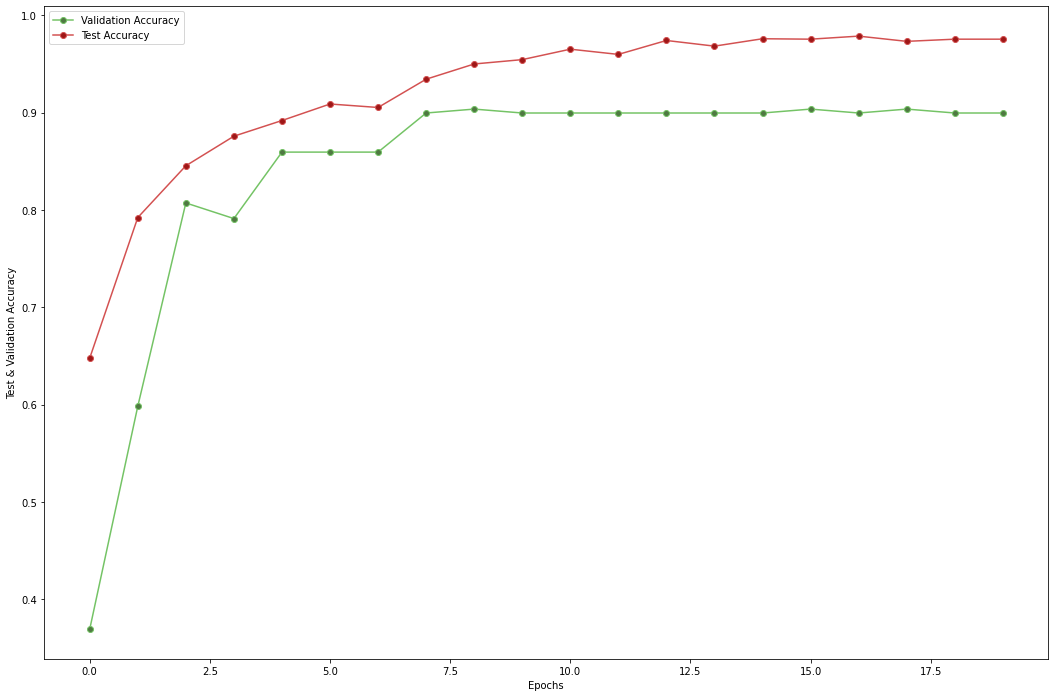

<Figure size 432x288 with 0 Axes>

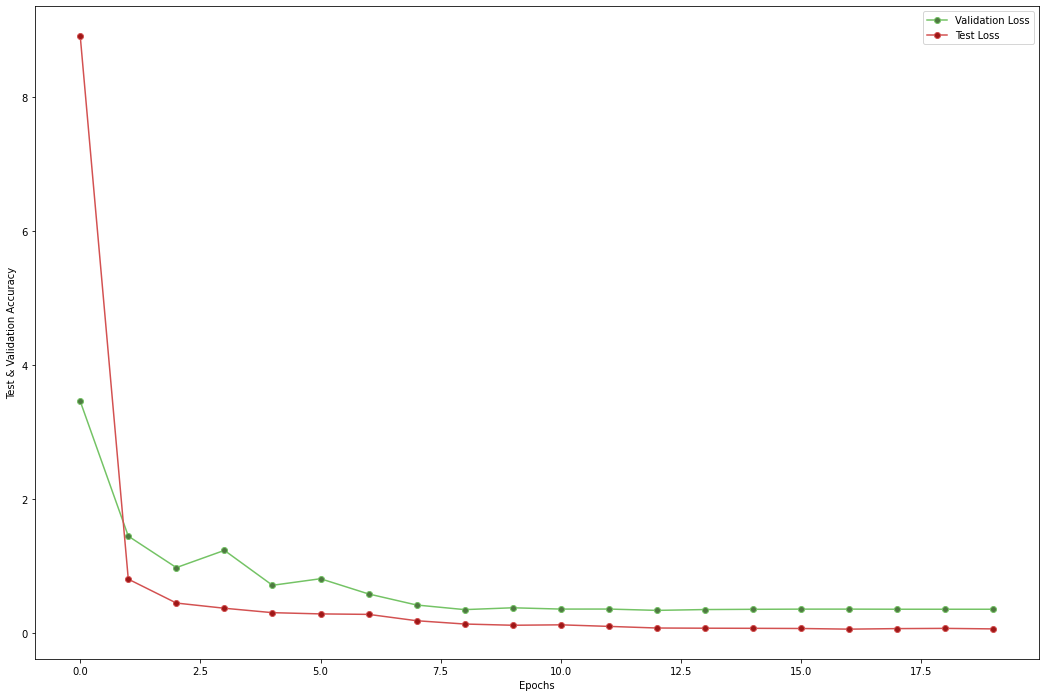

<Figure size 432x288 with 0 Axes>

In [66]:
filterwarnings('ignore')



plt.figure(figsize=(18,12))
plt.plot(r2.history['val_accuracy'],marker = 'o', markerfacecolor=colors_green[2], color=colors_green[3])
plt.plot(r2.history['accuracy'],marker = 'o',markerfacecolor=colors_red[2], color=colors_red[3])
plt.xlabel('Epochs')
plt.ylabel('Test & Validation Accuracy')
plt.legend(['Validation Accuracy','Test Accuracy'])
plt.figure()
plt.show()
plt.figure(figsize=(18,12))
plt.plot(r2.history['val_loss'],marker = 'o', markerfacecolor=colors_green[2], color=colors_green[3])
plt.plot(r2.history['loss'],marker = 'o',markerfacecolor=colors_red[2], color=colors_red[3])
plt.xlabel('Epochs')
plt.ylabel('Test & Validation Accuracy')
plt.legend(['Validation Loss','Test Loss'])
plt.figure()
plt.show() 


In [67]:
y_pred= model.predict(X_test)
y_pred = np.argmax(y_pred,axis=1)
y_pred[:15]

array([2, 2, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 2, 0, 2], dtype=int64)

In [68]:
y_test_new = np.argmax(y_test,axis=1)
#y_test_final = y_test_new.flatten()

In [69]:
print(classification_report(y_test_new,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.79      0.87        96
           1       0.82      0.90      0.86        91
           2       0.92      1.00      0.96        90

    accuracy                           0.90       277
   macro avg       0.90      0.90      0.89       277
weighted avg       0.90      0.90      0.89       277



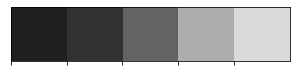

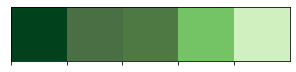

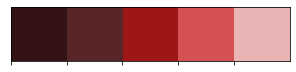

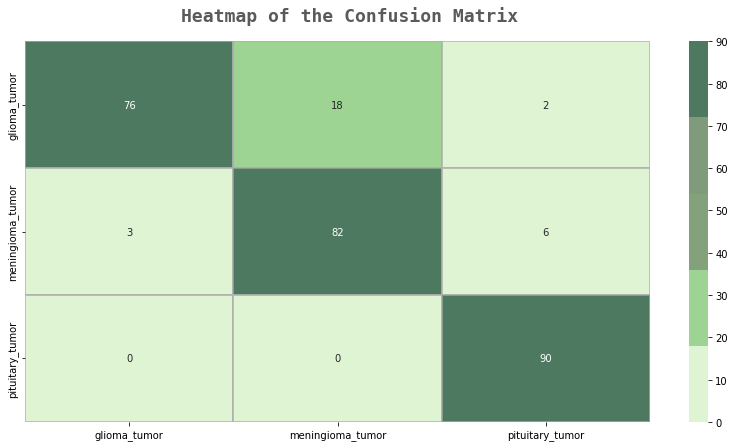

In [70]:
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_red = ["#331313", "#582626", '#9E1717', '#D35151', '#E9B4B4']
colors_green = ['#01411C','#4B6F44','#4F7942','#74C365','#D0F0C0']

sns.palplot(colors_dark)
sns.palplot(colors_green)
sns.palplot(colors_red)

fig,ax=plt.subplots(1,1,figsize=(14,7))
sns.heatmap(confusion_matrix(y_test_new,y_pred),ax=ax,xticklabels=labels,yticklabels=labels,annot=True,
           cmap=colors_green[::-1],alpha=0.7,linewidths=2,linecolor=colors_dark[3])
fig.text(s='Heatmap of the Confusion Matrix',size=18,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=0.92,x=0.28,alpha=0.8)

plt.show()

In [71]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)


In [72]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)#num_classes = 4
y_train.shape
y_test = to_categorical(y_test)#num_classes = 4
y_test.shape

(277, 3, 2)

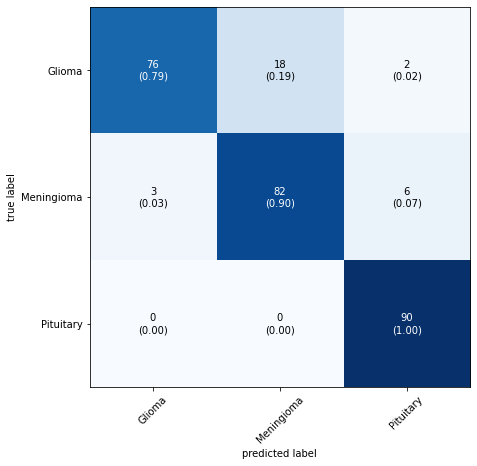

In [73]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

cm = confusion_matrix(y_test_new,y_pred)
plot_confusion_matrix(conf_mat = cm,figsize=(8,7),class_names = ['Glioma','Meningioma','Pituitary'],
                      show_normed=True);

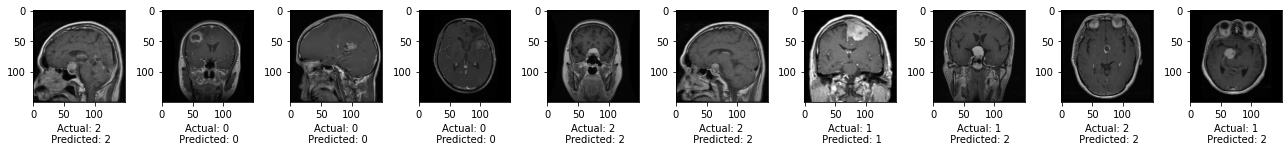

In [80]:
import random
plt.figure(figsize=(18,12))
for i in range(10):
    pred_res = "Correctly predicted!"
    sample_idx = random.choice(range(len(X_test)))
    plt.subplot(2,10,i+1)
    plt.imshow(X_test[sample_idx])
    if y_pred[sample_idx] != y_test_new[sample_idx]:
        pred_res = "Mispredicted!"
    plt.xlabel(f"Actual: {y_test_new[sample_idx]}\n Predicted: {y_pred[sample_idx]}")
    
plt.tight_layout()
plt.show()

In [75]:
model.save('D:/PBS/vggmodel')

INFO:tensorflow:Assets written to: D:/PBS/vggmodel\assets


In [83]:
from tensorflow.keras.models import load_model
cnn=load_model('D:/PBS/vggmodel')

In [84]:
from sklearn.metrics import confusion_matrix
y_pred = cnn.predict(X_test)
y_pred=np.argmax(y_pred,axis=1)
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred,labels=[0,1,2])
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

ValueError: Classification metrics can't handle a mix of unknown and multiclass targets

In [85]:
cnn.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_611 (Conv2D)         (None, 150, 150, 32)      416       
                                                                 
 conv2d_612 (Conv2D)         (None, 150, 150, 32)      4128      
                                                                 
 batch_normalization_604 (Ba  (None, 150, 150, 32)     128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 75, 75, 32)       0         
 g2D)                                                            
                                                                 
 dropout_11 (Dropout)        (None, 75, 75, 32)        0         
                                                                 
 conv2d_613 (Conv2D)         (None, 75, 75, 64)       

In [86]:
cnn.evaluate(X_test, y_test)

ValueError: in user code:

    File "d:\PBS\keras\engine\training.py", line 1525, in test_function  *
        return step_function(self, iterator)
    File "d:\PBS\keras\engine\training.py", line 1514, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "d:\PBS\keras\engine\training.py", line 1507, in run_step  **
        outputs = model.test_step(data)
    File "d:\PBS\keras\engine\training.py", line 1473, in test_step
        self.compute_loss(x, y, y_pred, sample_weight)
    File "d:\PBS\keras\engine\training.py", line 918, in compute_loss
        return self.compiled_loss(
    File "d:\PBS\keras\engine\compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "d:\PBS\keras\losses.py", line 141, in __call__
        losses = call_fn(y_true, y_pred)
    File "d:\PBS\keras\losses.py", line 245, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "d:\PBS\keras\losses.py", line 1789, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "d:\PBS\keras\backend.py", line 5083, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 3, 2) and (None, 3) are incompatible


In [ ]:
def img_pred(upload):
    for name, file_info in uploader.value.items():
        img = Image.open(io.BytesIO(file_info['content']))
    opencvImage = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
    img = cv2.resize(opencvImage,(150,150))
    img = img.reshape(1,150,150,3)
    p = model.predict(img)
    p = np.argmax(p,axis=1)[0]

    if p==0:
        p='Glioma Tumor'
    elif p==1:
        print('The model predicts that there is no tumor')
    elif p==2:
        p='Meningioma Tumor'
    else:
        p='Pituitary Tumor'

    if p!=1:
        print(f'The Model predicts that it is a {p}')

In [ ]:
uploader = widgets.FileUpload()
display(uploader)

FileUpload(value={}, description='Upload')

In [ ]:
button = widgets.Button(description='Predict')
out = widgets.Output()
def on_button_clicked(_):
    with out:
        clear_output()
        try:
            img_pred(uploader)
            
        except:
            print('No Image Uploaded/Invalid Image File')
button.on_click(on_button_clicked)
widgets.VBox([button,out])